In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

In [3]:
model = keras.models.load_model('mobileNet_02_0.999.h5') # load the model

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.mobilenet import preprocess_input

In [5]:
test_gen = ImageDataGenerator(preprocessing_function= preprocess_input)

test_ds = test_gen.flow_from_directory(
    '../data/data/Test/',
    target_size = (224,224),
    batch_size = 16,
    shuffle = False
)

Found 992 images belonging to 2 classes.


In [6]:
model.evaluate(test_ds)


62/62 [==============================] - 12s 189ms/step - loss: 0.0027 - accuracy: 1.0000


[0.002653223229572177, 1.0]

In [7]:
path = '../data/data/Test/WithMask/1163.png'

In [8]:
from tensorflow.keras.preprocessing.image import load_img


In [9]:
img = load_img(path, target_size=(224,224)) 

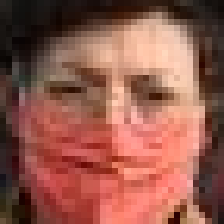

In [16]:
img

In [10]:
import numpy as np

In [11]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 224, 224, 3)

In [12]:
X = preprocess_input(X)

In [13]:
pred = model.predict(X)

1/1 [==============================] - 1s 547ms/step


In [14]:
classes =['WithMask', 'WithoutMask']

In [15]:
dict(zip(classes,pred[0]))

{'WithMask': 1.0257598, 'WithoutMask': -1.0819776}